### Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loads the dataset.
df = pd.read_csv('2019.csv')

# Overview of the 5 first lines of the dataset.
print("Dataset head:\n", df.head().T) # Transposed for better readability.

Dataset head:
                                     0        1       2        3            4
Overall rank                        1        2       3        4            5
Country or region             Finland  Denmark  Norway  Iceland  Netherlands
Score                           7.769      7.6   7.554    7.494        7.488
GDP per capita                   1.34    1.383   1.488     1.38        1.396
Social support                  1.587    1.573   1.582    1.624        1.522
Healthy life expectancy         0.986    0.996   1.028    1.026        0.999
Freedom to make life choices    0.596    0.592   0.603    0.591        0.557
Generosity                      0.153    0.252   0.271    0.354        0.322
Perceptions of corruption       0.393     0.41   0.341    0.118        0.298


In [3]:
# Overview of the number of entries and the characteristics of each column.
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
# Summary of the statistics for numerical data.
print("\nSummary statistics for numerical data:")
df.describe()


Summary statistics for numerical data:


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
# Checking for missing values.
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


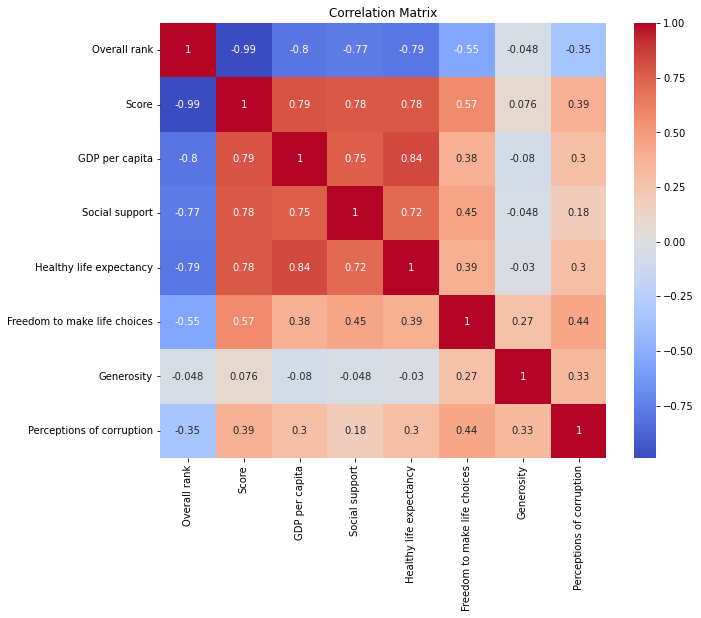

In [6]:
# Correlation analysis adjusted to exclude non-numeric columns.
numeric_df = df.select_dtypes(include=[np.number])  # This selects only the numeric columns.
correlation_matrix = numeric_df.corr()  # Generates the matrix over only the numeric features.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

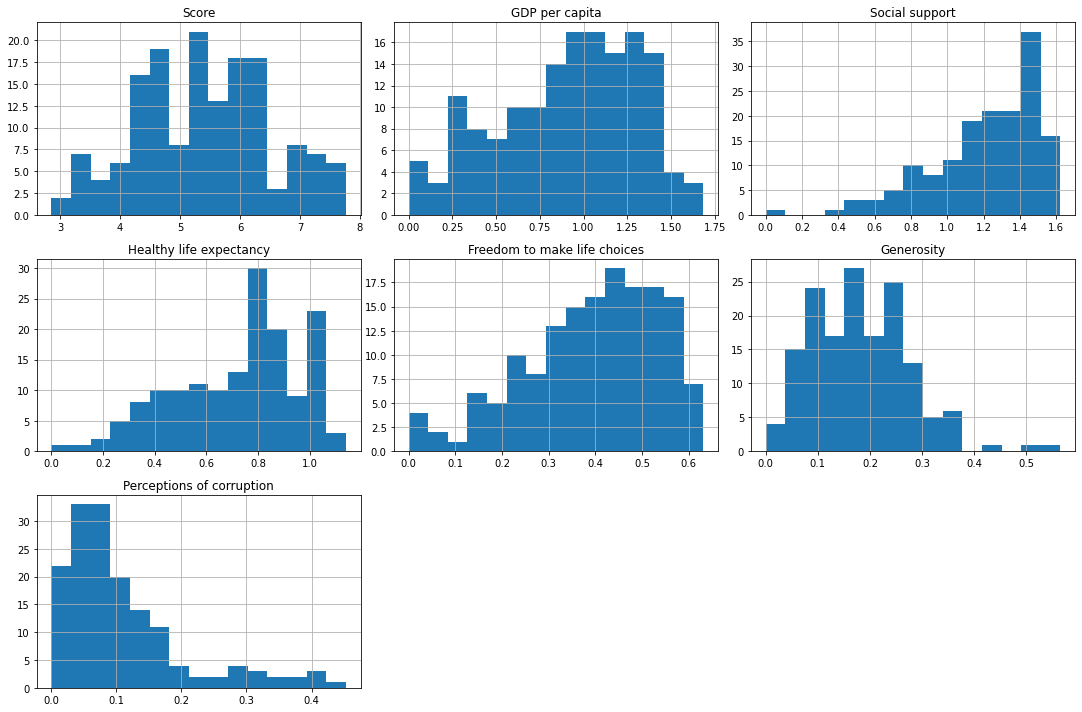

In [7]:
# Histograms of each variable.
df.drop(columns='Overall rank').hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

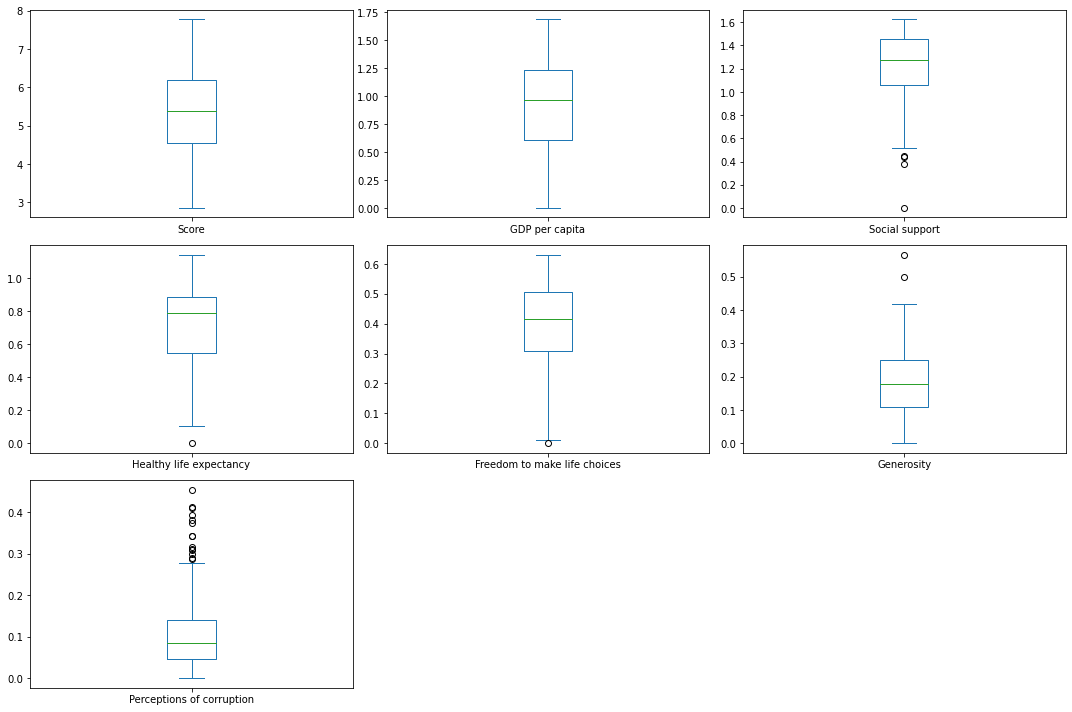

In [8]:
# Box Plots for Outlier Detection.
df.drop(columns='Overall rank').plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()

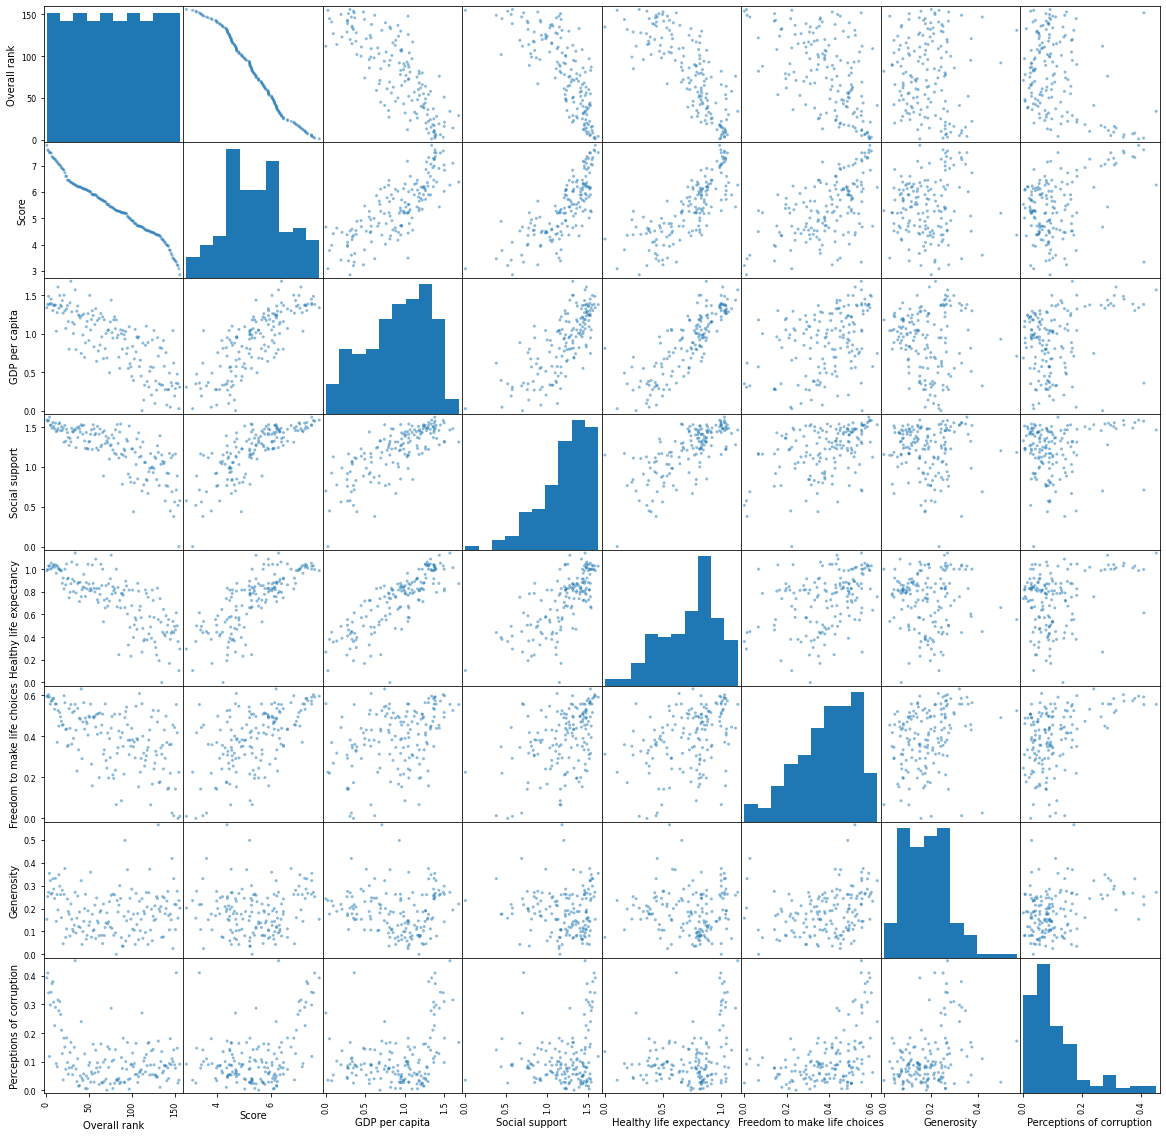

In [9]:
# Scatterplot Matrix.
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

### Exploratory Data Analysis - Code Rationalization

    The code starts with the import of libraries that are gonna be used throughout the code. 'pandas' is used for data manipulation and analysis, 'numpy' for numerical operations, 'matplotlib.pyplot' and 'seaborn' for plotting and data visualization.
    The dataset is then loaded from a CSV file into a pandas DataFrame 'df'.
    The data inspection starts with the display of the first 5 rows of the dataset (which we transposed for better readability. This helps in quickly understanding the structure and types of data columns. Using the 'df.info()', we got an information on the DataFrame which includes the number of entries, total nubmer of columns, each column data type, and the number of non-null values. This is quite useful for checking data completeness.
    Using the 'df.describe()' method, a summary statistics for numerical columns is generated, which includes mean, standard deviation, minimum, maxium, and quartilke values. This is importatn to understand the distribution and scale of numerical data.
    For the sake of doing a complete data exploration, we have calculated the number of missing values in each column using 'df.isnulll().sum()'. This has been done for the sole purpose of demonstration as investigeting the appendix of the World Happiness Report, the report mentions that all data has been pre-processed and no null values are present.
    Starting to dive deeper into data analysis, we developed a correlation alaysis, the code starts by extracting only the numeric columns from the data frame, it then computes a correlation matrix, visualized using a heatmap from the seaborn library. This allows the identification of relationships between variables.
    Histograms for all columns except 'Overall rank' are plotted to analyze the distribution of data across different variables. This was used in order to help identify peaks and the overall spread of the data.
    Box plots are used for the same variables to identify outliers.
    Lastly, we implemented a scatterplot matrix for all variables to visually inspect the relationship between pairs of variables. This can act similar to the correlation matrix, being able to spot trends and potential correlations.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defines the independent variables (X) and the dependent variable (y).
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']

# Splits the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creates and fits the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results.
y_pred = model.predict(X_test)

# Calculates the performance metrics.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.41446413835283524
R^2 Score: 0.6017537913445683


In [11]:
import statsmodels.api as sm
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy']]
y = df['Score']
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     134.5
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.43e-42
Time:                        20:06:54   Log-Likelihood:                -136.50
No. Observations:                 156   AIC:                             281.0
Df Residuals:                     152   BIC:                             293.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [12]:
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

for cluster in range(optimal_clusters):
    cluster_countries = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster} Countries:\n", cluster_countries['Country or region'].values)


AttributeError: 'NoneType' object has no attribute 'split'